**Dataset Name: forestfires.csv**

1. Loading the Dataset

Load the forestfires.csv dataset using Pandas.

Display the first five rows and basic statistics of numerical columns.

2. Exploratory Data Analysis (EDA)

Check for missing values in the dataset.

Count the number of fire incidents per month.

Visualize the distribution of fire occurrences across different days of the week.

Plot a histogram of area to check if the data is skewed.

Find the correlation between temp, RH, wind, rain, and area using a heatmap.
3. Regression Analysis

Predict the burned area (area) based on FFMC, DMC, DC, ISI, temp, RH, wind, and rain.

Train a linear regression model to predict area.

Evaluate the model using Mean Squared Error (MSE) and R² score.
4. Train-Test Split

Split the dataset into training (80%) and testing (20%) sets, using FFMC, DMC, DC, ISI, temp, RH, wind, and rain as features.
5. Data Scaling

Apply MinMaxScaler or StandardScaler to normalize the numerical features.

Compare the model performance before and after scaling.
6. Polynomial Regression

Extend the regression model using polynomial features of degree 2.

Compare its performance with the linear regression model.
7. k-Nearest Neighbors (kNN)

Define a binary target variable: If area > 0, classify it as fire detected (1), otherwise no fire (0).

Train a kNN classifier using temp, RH, wind, and rain as features.

Find the optimal value of k using cross-validation.
8. Error Measures

Compute MSE, RMSE, and Mean Absolute Error (MAE) for the regression models.

Compute the accuracy, precision, and recall for the kNN model.
9. Cross-Validation

Perform k-fold cross-validation (k=5) on the kNN classifier.

Report the average accuracy across folds.


In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('forestfires.csv')

In [30]:
df.head(5)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [32]:
df['month'].value_counts()

month
aug    184
sep    172
mar     54
jul     32
feb     20
jun     17
oct     15
apr      9
dec      9
jan      2
may      2
nov      1
Name: count, dtype: int64

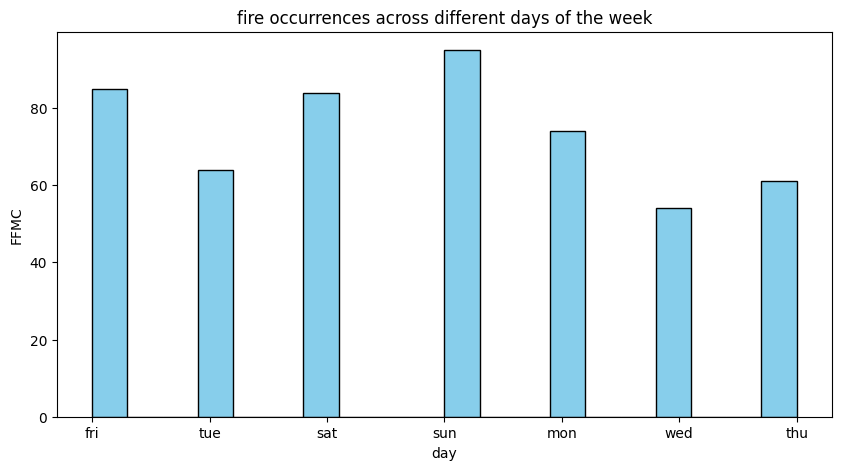

In [33]:
plt.figure(figsize=(10, 5))

plt.hist(df['day'], bins=20, color='skyblue', edgecolor='black')
 
plt.xlabel('day')
plt.ylabel('FFMC')

plt.title('fire occurrences across different days of the week')

plt.show()

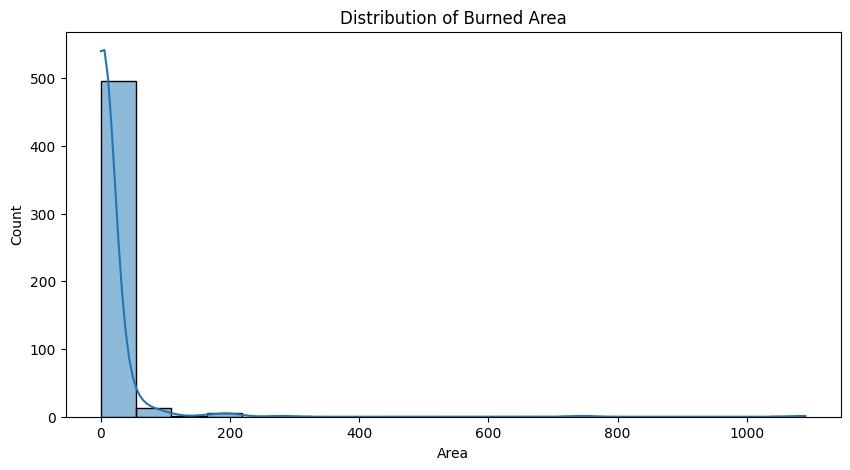

In [38]:
plt.figure(figsize=(10,5))
sns.histplot(df['area'], bins=20, kde=True)
plt.xlabel("Area")
plt.title("Distribution of Burned Area")
plt.show()


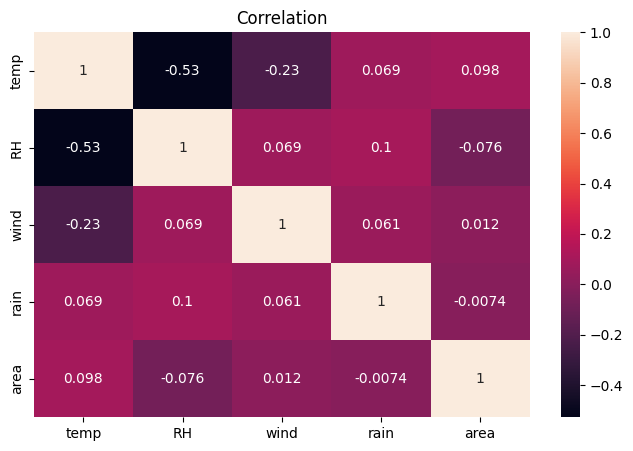

In [44]:
corr_mat = df[['temp', 'RH', 'wind', 'rain', 'area']].corr()

plt.figure(figsize=(8,5))
sns.heatmap(corr_mat, annot=True)
plt.title("Correlation")
plt.show()

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

features = ['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain']
X = df[features]
y = df['area']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)


In [50]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")

Mean Squared Error (MSE): 11780.009395280173
R² Score: 0.0006576927283136191


In [51]:
features = ['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain']
X = df[features] 
y = df['area']   

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

Training set size: 413 samples
Testing set size: 104 samples


In [53]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr.fit(X_train_scaled, y_train)

y_pred_scaled = lr.predict(X_test_scaled)

mse_scaled = mean_squared_error(y_test, y_pred_scaled)
r2_scaled = r2_score(y_test, y_pred_scaled)

print(f"After Scaling -> MSE: {mse_scaled}, R² Score: {r2_scaled}")

After Scaling -> MSE: 11780.009395280167, R² Score: 0.0006576927283140632


In [58]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)

y_pred_poly = poly_reg.predict(X_test_poly)
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print(f"Polynomial Regression -> MSE: {mse_poly}, R² Score: {r2_poly}")

Polynomial Regression -> MSE: 13638.49874229216, R² Score: -0.15700491769599978


In [59]:
df['fire_detected'] = (df['area'] > 0).astype(int)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

X_knn = df[['temp', 'RH', 'wind', 'rain']]
y_knn = df['fire_detected']

X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X_knn, y_knn, test_size=0.2, random_state=42)

k_values = list(range(1, 21))
cv_scores = [cross_val_score(KNeighborsClassifier(n_neighbors=k), X_train_knn, y_train_knn, cv=5).mean() for k in k_values]

optimal_k = k_values[cv_scores.index(max(cv_scores))]
print(f"Optimal k: {optimal_k}")

knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(X_train_knn, y_train_knn)

y_pred_knn = knn.predict(X_test_knn)

Optimal k: 15


In [61]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
mae = mean_absolute_error(y_test, y_pred)

print(f"Regression Errors -> MSE: {mse:.4f}, RMSE: {rmse:.4f}, MAE: {mae:.4f}")

Regression Errors -> MSE: 11780.0094, RMSE: 108.5358, MAE: 24.1987


In [62]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

accuracy = accuracy_score(y_test_knn, y_pred_knn)
precision = precision_score(y_test_knn, y_pred_knn)
recall = recall_score(y_test_knn, y_pred_knn)

print(f"kNN Model Performance -> Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}")

kNN Model Performance -> Accuracy: 0.5192, Precision: 0.5273, Recall: 0.5472


In [63]:
cv_scores = cross_val_score(knn, X_knn, y_knn, cv=5)
print(f"5-Fold Cross-Validation Accuracy: {cv_scores.mean():.4f}")

5-Fold Cross-Validation Accuracy: 0.4952
